In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline

In [18]:
df = pd.read_csv('creditcard.csv')

Parameters have been modified by PCA by default, which is why they seem so generic. This will facilitate the model comparison

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [23]:
len(df[df['Class']==1])

492

The fraudulent class is minor compared to the other. This could pose a problem

In [15]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (20, 16)})

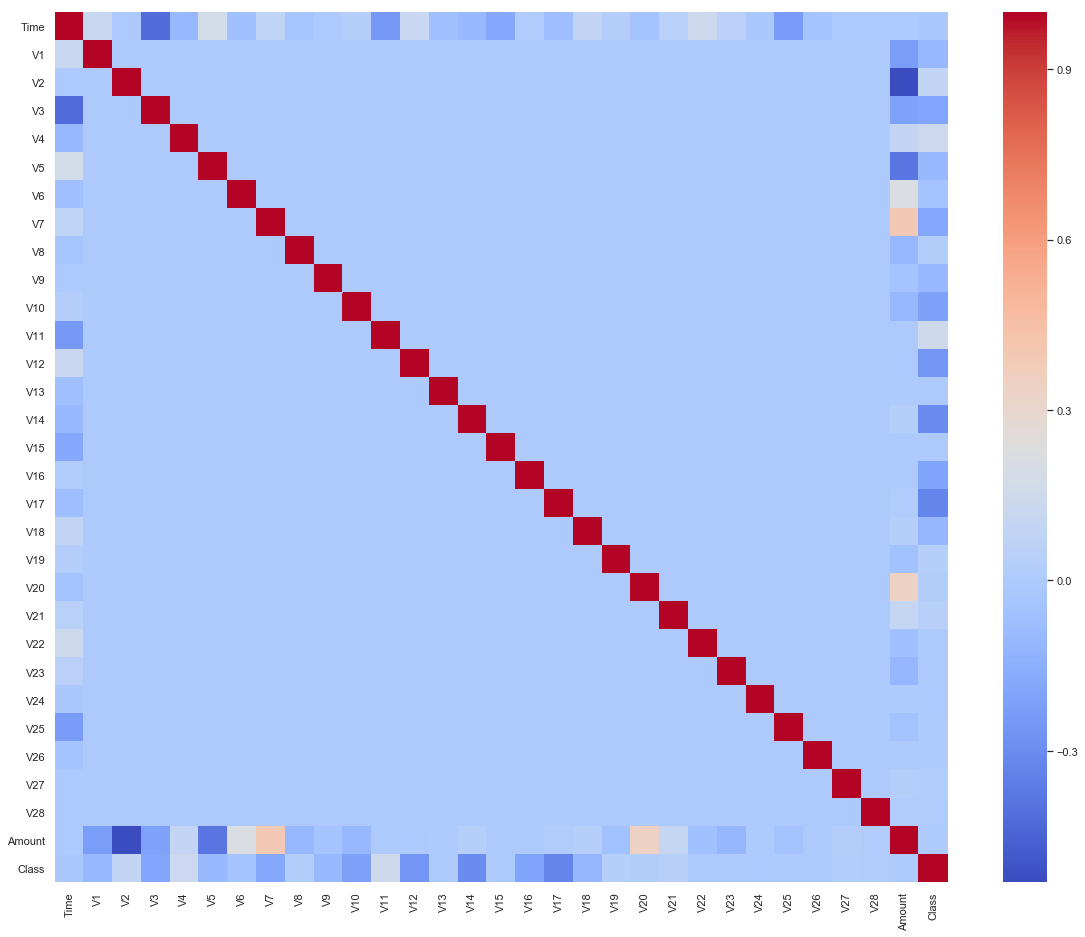

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm')

Very low correlations, given that PCA was used. Should benefit ridge more than lasso, since lasso is specifically to reduce the influence of highly correlated parameters. 

In [22]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
X = df.drop('Class', axis=1)
Y = df['Class']

Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
logregr = linear_model.LogisticRegression()

In [32]:
logregr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print('\nCoefficients: \n', logregr.coef_)
print('\nIntercept: \n', logregr.intercept_)
print('\nR-squared:')
print(logregr.score(X, Y))


Coefficients: 
 [[-7.12206575e-05  3.18682793e-01 -4.83850387e-01 -7.93127563e-01
   1.20289540e-01  5.75021683e-02 -5.40495940e-02  3.35171136e-01
  -3.74165961e-01 -3.88332949e-01 -2.06986480e-01 -2.86517603e-01
   1.85123052e-02 -3.06438278e-01 -6.94224243e-01 -4.27600151e-01
  -2.94579466e-01 -4.39702486e-01  3.10746972e-02  2.64950391e-02
   9.19504147e-02  2.48760049e-01  3.50865605e-01  6.76883576e-02
  -2.44272764e-02 -3.56044928e-01  6.07018132e-02 -8.87962032e-02
   2.77870551e-02 -5.58303923e-03]]

Intercept: 
 [-1.62808759]

R-squared:
0.9990239003957065


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(logregr, X, Y, cv=10)

array([0.98416544, 0.99919247, 0.999684  , 0.99940311, 0.99887644,
       0.99912219, 0.99964888, 0.99877107, 0.99891152, 0.99873596])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print('With 40% Holdout: ' + str(logregr.fit(X_train, y_train).score(X_test, y_test)))

With 40% Holdout: 0.9989203233763155


Ridge regression

In [64]:
from sklearn.linear_model import Ridge
ridgeregr = linear_model.Ridge(alpha=0.5)

In [65]:
ridgeregr.fit(X,Y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
print('\nCoefficients: \n', ridgeregr.coef_)
print('\nIntercept: \n', ridgeregr.intercept_)
print('\nR-squared:')
print(ridgeregr.score(X, Y))


Coefficients: 
 [-4.39431272e-09 -1.92862194e-03  2.86900006e-03 -5.09422385e-03
  3.77396514e-03 -2.33149491e-03 -1.65970039e-03 -6.84505297e-03
  8.38696088e-04 -3.62392703e-03 -8.09928077e-03  6.25020590e-03
 -1.07873017e-02 -2.13984867e-04 -1.31907948e-02 -2.27611914e-04
 -9.30350907e-03 -1.59961867e-02 -5.57691875e-03  1.90499512e-03
  2.82333394e-04  2.03984926e-03  2.46945394e-04  1.60580024e-04
 -5.15858337e-04  3.34052962e-04  3.77635688e-04  1.67847893e-03
  1.13825266e-03  7.13876821e-06]

Intercept: 
 0.001513419926681036

R-squared:
0.5216390655756797


In [67]:
cross_val_score(ridgeregr, X, Y, cv=10)

array([0.30753515, 0.66581025, 0.49967997, 0.44880076, 0.43460613,
       0.70094831, 0.3376025 , 0.4594303 , 0.46303003, 0.38248886])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print('With 40% Holdout: ' + str(ridgeregr.fit(X_train, y_train).score(X_test, y_test)))

With 40% Holdout: 0.522804470136387


Lasso regression

In [69]:
from sklearn.linear_model import Lasso
lassoregr = linear_model.Lasso(alpha=0.5)

In [70]:
lassoregr.fit(X,Y)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
print('\nCoefficients: \n', lassoregr.coef_)
print('\nIntercept: \n', lassoregr.intercept_)
print('\nR-squared:')
print(lassoregr.score(X, Y))


Coefficients: 
 [-1.05540604e-08 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

Intercept: 
 0.0027281568288117443

R-squared:
0.00015178146961725147


In [72]:
cross_val_score(lassoregr, X, Y, cv=10)

array([-4.01579132e-04, -2.02482181e-06, -2.43486341e-04, -5.25569669e-04,
       -1.06942310e-03, -7.90319223e-04, -5.12984400e-04, -2.04103209e-05,
       -5.18422092e-04, -1.29031020e-04])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print('With 40% Holdout: ' + str(lassoregr.fit(X_train, y_train).score(X_test, y_test)))

With 40% Holdout: 0.00014934975710523268
